@author: [s16496@pjwstk.edu.pl](mailto:s16496@pjwstk.edu.pl)

Pobieram potrzebne mi biblioteki NumPy - do operacji na tablicach, Pandas - do analizy i czyszczenia danych, Sklearn - do machine learningu oraz plotly express, matplotlib i seaborn do wizualizacji

In [3]:
import plotly
import plotly.express as px
import numpy as np
import pandas as pd

Pobieram i obrabiam dane

In [4]:
appsttore_data = pd.read_csv('drive/MyDrive/store.csv')
appsttore_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,GAME,4.5,4447388,67,1.000000e+08,Free,0.0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up
1,Subway Surfers,GAME,4.5,27722264,76,1.000000e+09,Free,0.0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up
2,Candy Crush Saga,GAME,4.4,22426677,74,5.000000e+08,Free,0.0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up
3,Solitaire,GAME,4.7,254258,23,1.000000e+07,Free,0.0,Everyone,Card,1-Aug-18,2.137.0,4.1 and up
4,Bubble Shooter,GAME,4.5,148897,46,1.000000e+07,Free,0.0,Everyone,Casual,17-Jul-18,1.20.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,Winter Wonderland,GAME,4.0,1287,38,5.000000e+04,Free,0.0,Everyone,Word,18-Dec-13,1,2.2 and up
1140,Soccer Clubs Logo Quiz,GAME,4.2,21661,16,1.000000e+06,Free,0.0,Everyone,Trivia,24-May-18,1.3.81,4.0 and up
1141,Sid Story,GAME,4.4,28510,78,5.000000e+05,Free,0.0,Teen,Card,1-Aug-18,2.6.6,4.0.3 and up
1142,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496,81,1.000000e+06,Free,0.0,Teen,Action,7-Aug-18,1.5.447,4.0 and up


In [5]:
appsttore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             1144 non-null   object 
 1   Category        1144 non-null   object 
 2   Rating          1097 non-null   float64
 3   Reviews         1144 non-null   int64  
 4   Size            1015 non-null   object 
 5   Installs        1144 non-null   float64
 6   Type            1144 non-null   object 
 7   Price           1144 non-null   float64
 8   Content Rating  1144 non-null   object 
 9   Genres          1144 non-null   object 
 10  Last Updated    1144 non-null   object 
 11  Current Ver     1144 non-null   object 
 12  Android Ver     1144 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 116.3+ KB


In [6]:
px.scatter_matrix(data_frame=appsttore_data, dimensions=['Rating', 'Reviews','Installs', 'Price'],
                  color='Type', title='Scatter Matrix - app')

Spawdzam ile się spodziewać opini w stosunku do ilości instalacji

In [7]:
appsttore_data = appsttore_data[['Reviews', 'Installs']]
appsttore_data

,Reviews,Installs
0,4447388,1.000000e+08
1,27722264,1.000000e+09
2,22426677,5.000000e+08
3,254258,1.000000e+07
4,148897,1.000000e+07
...,...,...
1139,1287,5.000000e+04
1140,21661,1.000000e+06
1141,28510,5.000000e+05
1142,56496,1.000000e+06


In [8]:
appsttore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   1144 non-null   int64  
 1   Installs  1144 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 18.0 KB


Dziele wszystko przez 1000 żeby otrzymać dane w tysiącach

In [9]:
appsttore_data = appsttore_data.div(10000)
appsttore_data

,Reviews,Installs
0,444.7388,10000.0
1,2772.2264,100000.0
2,2242.6677,50000.0
3,25.4258,1000.0
4,14.8897,1000.0
...,...,...
1139,0.1287,5.0
1140,2.1661,100.0
1141,2.8510,50.0
1142,5.6496,100.0


In [10]:
appsttore_data.astype('int64').dtypes

Reviews     int64
Installs    int64
dtype: object

Tworze zbiór testowy i treningowy

In [11]:
from sklearn.model_selection import train_test_split
appsttore_data_train, appsttore_data_test = train_test_split(appsttore_data, test_size=1000)

In [12]:
appsttore_data_test

,Reviews,Installs
955,2.3599,10.0
476,2.1107,10.0
665,0.4396,10.0
92,46.1137,1000.0
453,23.4606,1000.0
...,...,...
993,7.6627,500.0
475,2.6893,100.0
62,29.5305,1000.0
203,52.2466,1000.0


In [13]:
appsttore_data_train

,Reviews,Installs
282,33.7913,500.0
1099,2.8151,100.0
770,5.4221,100.0
146,21.6675,1000.0
232,1048.6018,50000.0
...,...,...
1093,7.1476,100.0
757,0.0064,0.5
71,113.7271,5000.0
439,0.0609,1.0


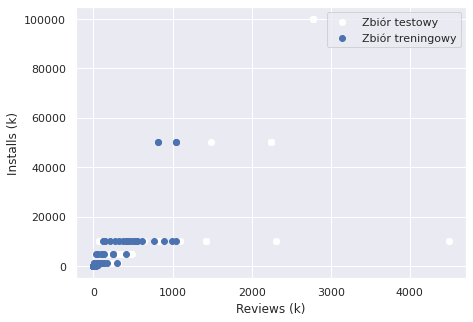

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize=(7, 5))
plt.scatter(appsttore_data_test.Reviews, appsttore_data_test.Installs, c='w', label='Zbiór testowy')
plt.scatter(appsttore_data_train.Reviews, appsttore_data_train.Installs, c='b', label='Zbiór treningowy')
plt.xlabel('Reviews (k)')
plt.ylabel('Installs (k)')
plt.legend()

Stosuje regresję i oceniam model

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(appsttore_data_train.Reviews.values.reshape(-1, 1), appsttore_data_train.Installs)

lin_reg.score(appsttore_data_train.Reviews.values.reshape(-1, 1), appsttore_data_train.Installs)

0.6351630312929406

## SVM

Wykorzystuje Support Vector regression typ support vector machine obsługujący regresję

Importuje potrzebne metody

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

Standaryzuje cechy (usunięcie średniej, skalowanie do wariancji jednostkowek)

In [17]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(appsttore_data_train.Reviews.values.reshape(-1, 1))
y = sc_y.fit_transform(appsttore_data_train.Installs.values.reshape(-1, 1))

Ustawiam typ regresji na linearną i przypisuje do niej dane

In [18]:
regressor = SVR(kernel='linear')
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Wizualizacja rezultatu SVR

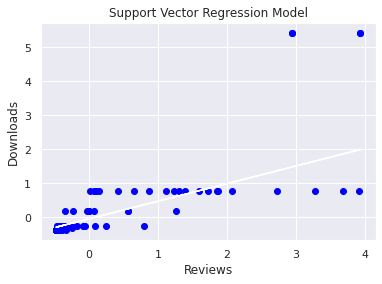

In [19]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'white')
plt.title('Support Vector Regression Model')
plt.xlabel('Reviews')
plt.ylabel('Downloads')
plt.show()

## Sieć neuronowa - na bazie TensorFLow

Importuje TensorFlow

In [20]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


Wydzielam cechę którą będzie przewidywał model

In [22]:
train_features = appsttore_data_train.copy()
test_features = appsttore_data_train.copy()

train_labels = train_features.pop('Reviews')
test_labels = test_features.pop('Reviews')

In [23]:
train_labels

282       33.7913
1099       2.8151
770        5.4221
146       21.6675
232     1048.6018
          ...    
1093       7.1476
757        0.0064
71       113.7271
439        0.0609
573        2.1223
Name: Reviews, Length: 144, dtype: float64

Tworzę warstwę normalizacji

In [24]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [25]:
print(normalizer.mean.numpy())

[3333.8958]


In [26]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[500.]]

Normalized: [[-0.33]]


Normalizuje ilość pobrań

In [27]:
downloads = np.array(train_features['Installs'])

downloads_normalizer = preprocessing.Normalization(input_shape=[1,])
downloads_normalizer.adapt(downloads)

Buduje model sekwencyjny

In [28]:
downloads_model = tf.keras.Sequential([
    downloads_normalizer,
    layers.Dense(units=1)
])

downloads_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [29]:
downloads_model.predict(downloads[:10])

array([[ 0.08450167],
       [ 0.09642895],
       [ 0.09642895],
       [ 0.06959257],
       [-1.3914992 ],
       [ 0.09938095],
       [ 0.09938095],
       [ 0.09940778],
       [ 0.09642895],
       [ 0.08450167]], dtype=float32)

Konfiguracja metody uczenia

In [35]:
downloads_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

Odpalenie uczenia

In [36]:
%%time
history = downloads_model.fit(
    train_features['Installs'], train_labels,
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 5.4 s, sys: 89.3 ms, total: 5.49 s
Wall time: 5.36 s


Sprawdzenie historii uczenia

In [37]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,81.757179,101.358498,95
96,81.649033,101.176842,96
97,81.533073,100.999466,97
98,81.424850,100.821541,98
99,81.309975,100.640327,99


In [46]:
x = tf.linspace(0.0, 40000, 40000)
y = downloads_model.predict(x)

In [45]:
def plot_rooms(x, y):
  plt.scatter(train_features['Installs'], train_labels, label='Dane')
  plt.plot(x, y, color='r', label='Przewidywania')
  plt.xlabel('Downloads')
  plt.ylabel('Reviews')
  plt.legend()

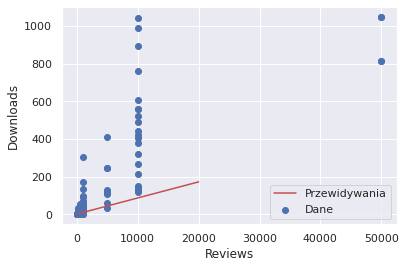

In [40]:
plot_rooms(x,y)